<a href="https://colab.research.google.com/github/DianaTorres-4/Inteligencia-Artificial/blob/main/CNN/Clasificacion_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()


cargaremos el conjunto de datos MNIST

In [ ]:
type(digits)

sklearn.utils._bunch.Bunch

veremos el tipo de digistos que es lo que contienen el dataset

In [ ]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

exploraremos el datset y veremos que es lo que contiene el dataset

In [ ]:
digits["DESCR"]

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

ponemos el DESCR para obtener la informacion detallada

In [ ]:
dict_keys([
    'data', 'target', 'frame',
    'feature_names', 'target_names', 'images',
    'DESCR'
])
# Resultado y no se corre

es el resultado y no se corre si no sale error

In [ ]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

volvemos a poner el print DESCR y nos mostrara nuevamente toda la informacion detallada

In [ ]:
index = 80

image = digits.images[index]
label = digits.target[index]


fijaremos el indice de la imagen que queremos visualizar, para obtener la imagen del digito y su respectiva etiqueta

In [ ]:
print(image)


[[ 0.  0.  0.  1. 14. 13.  1.  0.]
 [ 0.  0.  0.  1. 16. 16.  3.  0.]
 [ 0.  5. 11. 15. 16. 16.  0.  0.]
 [ 0.  4. 15. 16. 16. 15.  0.  0.]
 [ 0.  0.  0.  8. 16.  7.  0.  0.]
 [ 0.  0.  0. 10. 16.  3.  0.  0.]
 [ 0.  0.  0.  8. 16.  6.  0.  0.]
 [ 0.  0.  0.  2. 13. 15.  2.  0.]]


pedimos que imprima la imagen de la matriz

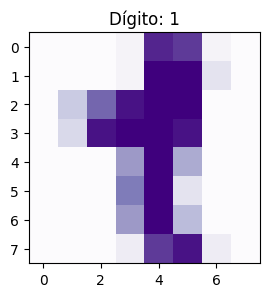

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3)) # se genera una figura de 3x3
plt.imshow(image, cmap=plt.cm.Purples)
plt.title(f'Dígito: {label}')
plt.show()


pedimos que nos muestre la imagen

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)
# Conjunto de prueba

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
#Los resultados los mete a un vector to_categorical

realizamos los conjuntos de prueba y los conjuntos de entrenamiento y el resultado de los conjuntos de prueba y los de entrenamiento los muestra como resultados en un vector

In [ ]:
print(X_train.shape)
print(X_test.shape)


(1437, 64)
(360, 64)


pedimos que nos muestre el conjunto de los entrenamientos de prueba y los de entrenamiento

In [ ]:
X_train.shape # 1437 filas y 64 columnas pero esta mal

(1437, 64)

nos dice el numero de filas y las columnas de la matriz

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


vamos a ver como se ve el primer elemento de la variable

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalizaremos los datos

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.         -0.34169755 -0.46336049  0.50836462 -2.54590607 -1.03722581
  -0.40623424 -0.13101874]
 [-0.06103492 -0.61725402  0.30881425  0.00348328 -2.18152552 -1.35608548
  -0.52465505 -0.13336005]
 [-0.04991522  0.12851911  1.08857992 -0.19343737 -1.16010978 -1.27307852
  -0.552537   -0.11409248]
 [-0.03733267  0.86365151  1.13744682 -1.16195968 -1.60835913 -1.28296188
  -0.62554872 -0.04573894]
 [ 0.          1.09151514  1.34318585 -1.12678131 -0.90106555 -1.13185292
  -0.81347241  0.        ]
 [-0.06519029  0.82828946  1.39981472 -0.82540858  0.69177178  1.17865528
  -0.33784246 -0.09403434]
 [-0.03963009  0.15955797  1.14244768  0.64507954 -1.42282149  0.68917912
   1.47990131 -0.21608405]
 [-0.02638899 -0.30677646 -0.49962244 -0.246272    0.84804385  1.05270303
   0.45952251 -0.19710003]], shape=(8, 8), dtype=float64)


Notamos como se ve el primer elemento de la variable que en este caso es X

In [ ]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

 Redimensionar el tensor a la forma (total, 8, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), #Lugares que se va a ir recorriendo
        activation='relu',
        input_shape=(8, 8, 1) # entrada
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # salida de neurona
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Crear el modelo de CNN, despues en la linea 4 del codigo nos dice los lugares que se va a ir recorriendo de ahi pasaremos ah activarlo y con la funcion de RELU y de ahi daremos la entrada de la neurona detallamos todo y de ahi le damos la salida a la neurona

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

depsues vamos a pedir que nos muestre y nos escale las imagenes para normalizar los valores de pixeles

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9998 - loss: 0.0265 - val_accuracy: 0.9653 - val_loss: 0.0832
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9958 - loss: 0.0251 - val_accuracy: 0.9757 - val_loss: 0.0874
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 0.9757 - val_loss: 0.0912
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9995 - loss: 0.0120 - val_accuracy: 0.9722 - val_loss: 0.0876
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 0.9653 - val_loss: 0.0839
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9757 - val_loss: 0.0798
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.9757 - val_loss: 0.0852
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.9688 - val_loss:

depsues pedimos que nos muestre el modelo 30 epocas

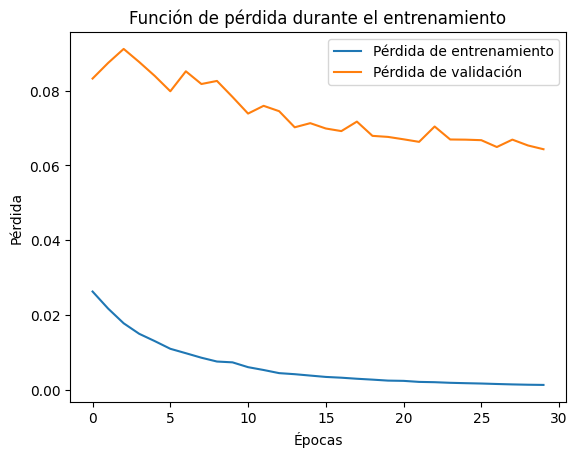

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


despues pedimos que nos haga una grafica y nos muestre nuevamete si el modelo aprendio o no

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.0274 
Loss: 0.03431142866611481, Accuracy: 0.9833333492279053


pedimos que evaluen el modelo pero solo con los conjuntos de prueba

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Se calculan las predicciones del modelo en el conjunto de prueba y se obtienen las clases

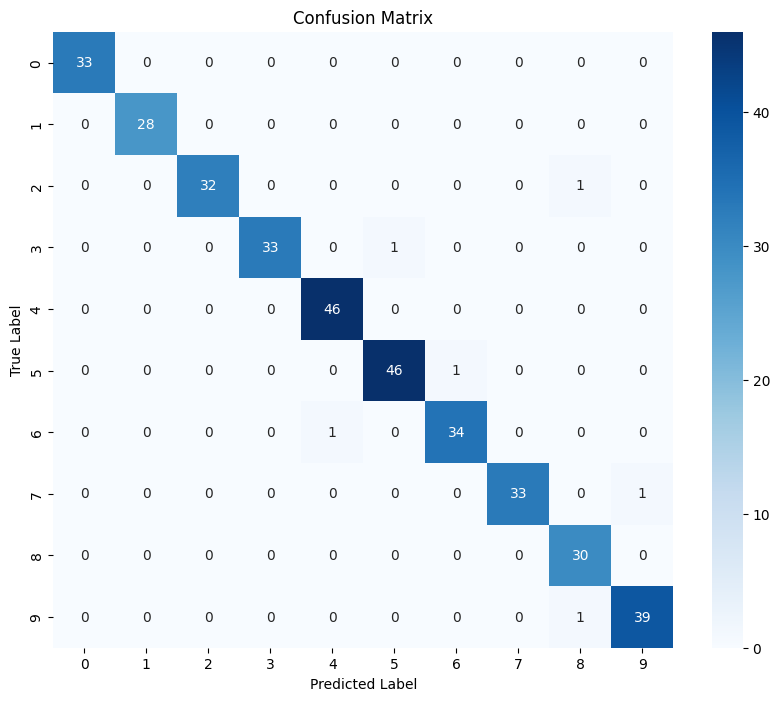

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.975


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

    # este modelo nos dice cuanto aprende y si todos los valores estan en la diagonal no se equivoco y los que estan afuera son los que se equivocaron

nos muestra la matriz de confusion y nos muestra la sensibilidad para cada case

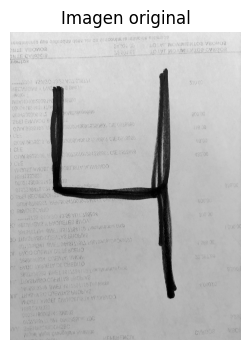

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero(1).png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


vamos a cragra una imagen y le daremos acceso a nuestro drive para que podamos visualizar la imagen en colab

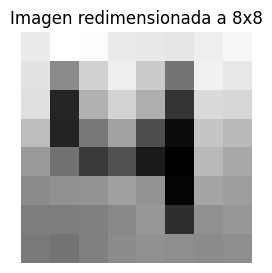

In [ ]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


vamos a redimensionar la imagen a una matriz de tamaño de 8x8 y mostraremos como es que se ve la imagen

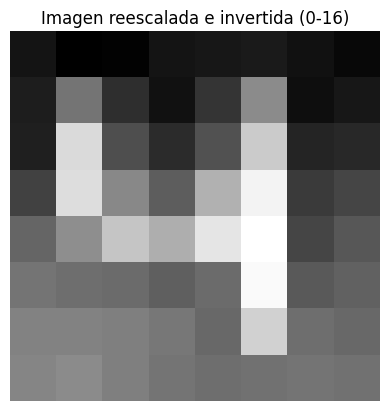

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


rescalaremos la imagen en valores de 0-16

In [ ]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

estandarizaremos la imagen

In [ ]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicción: 4


y pediremos una evaluacion que nos debe de dar el numero de la imagen que ingresamos en los codigos anteriores cuando le dimos acceso a drive